# Retificador controlado de onda completa (Carga R/L)

<center>
<img width="300" height="500" src="Figuras/12_controlado_meia_onda_rl.png">
</center>

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

/home/diesson/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


# - Tensão na carga - # 
Vpk:	 169.7056274847714 
Vm: 	 2.0022033463518598e-15 
Vrms: 	 119.21430619173063
# - Corrente na carga - # 
Ipk: 	 6.728447428404679 
Im: 	 1.4907497792709954e-15 
Irms: 	 4.729516321379533
# - Potências - # 
Ppk:	 1022.3948295436034 
P: 	 447.36648704577544 
S: 	 567.541958565544
# - Fatores - # 
FP:	 0.7882527102956217 
THD V:	 0.11462773161878545 
THD I:	 0.015779576928194195


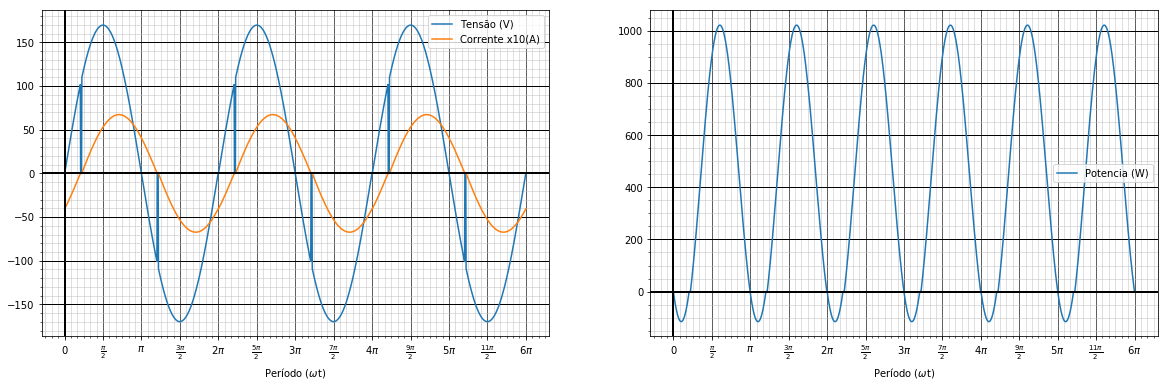

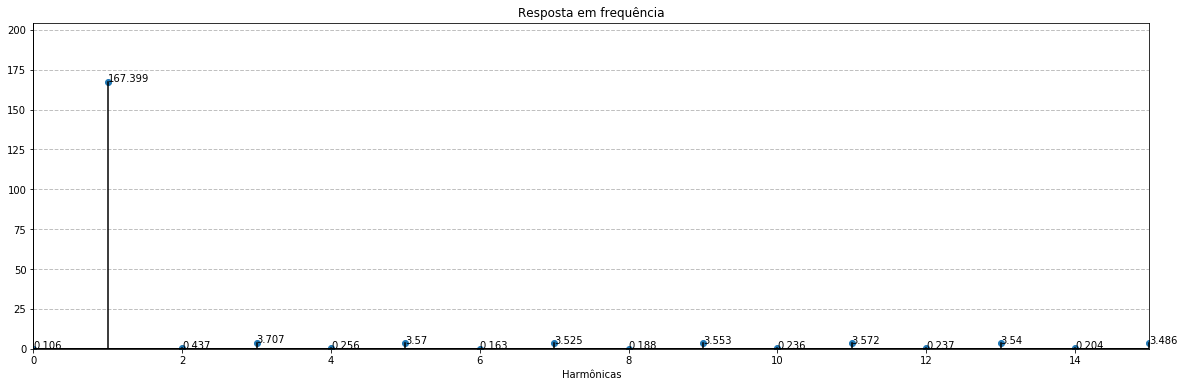

In [2]:
########### RETIFICADOR ONDA COMPLETA ###########
################### CARGA R/L ###################

V_pk = 120*sqrt(2)
Freq = 60
R = 20
L = 0.04
T = 2*pi
a = radianos(40)

w = 2*pi*Freq

XL = w * L
XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL) #(r, phi) = polar(z)
tal = L/R

ab = calculo_ab(f'{V_pk/Z}*(sin(x - {teta}) - sin({a-teta})*exp(({a}-x)/{w*tal}))', pi, 'numpy')
b = ab[0]
a0 = a-pi
b0 = b-pi
a2 = pi+a
b2 = pi+b

func_v = f'{V_pk}*sin(x)*({degrau(0, b-pi)} + {degrau(a, b)} + {degrau(a2, b2, 1, -1)})'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = f'({V_pk/Z}*(sin(x - {teta}) - sin({a0-teta})*exp(({a0}-x)/{w*tal})))*{degrau(0, b0)}'
func_i += f'+ ({V_pk/Z}*(sin(x - {teta}) - sin({a-teta})*exp(({a}-x)/{w*tal})))*{degrau(a, b)}'
func_i += f'+ ({V_pk/Z}*(sin(x - {teta}) - sin({a2-teta})*exp(({a2}-x)/{w*tal})))*{degrau(a2, b2)}'
#func_i = f'({V_pk/Z}*(sin(x - {teta}) - sin({a-teta})*exp(({a}-x)/{w*tal})))*{degrau(a, b)}'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*(V_pk/sqrt(2))
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)